In [255]:
import numpy as np
import matplotlib.pyplot as plt

class TrafficSimulation:
    
    def __init__(self, road_length = 100, density = 0.2, max_vel = 5, p_slowdown = 0.5, initial_config = False):
        self.road_length = road_length
        self.density = density
        self.max_vel = max_vel
        self.p_slowdown = p_slowdown
        if not initial_config:
            self.state = np.zeros(road_length)
            #initial empty locations (-1s)
            init_empty_loc = np.random.choice(list(range(road_length)),int((1-density)*road_length), replace=False)
            for loc in init_empty_loc:
                self.state[loc] = -1
        else:
            self.state = np.array(initial_config)
    
    def update(self):
        flows = 0
        #move cars
        new_state = np.array([-1]*self.road_length)
        for i in range(self.road_length):
            if self.state[i] >= 0:
                if i+self.state[i] >= self.road_length:
                       flows+=1
                new_state[int((i+self.state[i])%self.road_length)]=self.state[i]
        self.state = new_state
        
        #updating velocities
        for i in range(self.road_length):
            if self.state[i] >= 0:
                new_vel = self.state[i]
                #rule 1
                if self.state[i] < self.max_vel:
                    new_vel+=1

                #rule 2
                #check distance
                distance = 5
                for d in range(1,6):
                    if self.state[int((i+d)%self.road_length)] != -1:
                        distance = d-1
                        break
                if new_vel > distance:
                    new_vel = distance

                #rule 3
                if new_vel >= 1:
                    if np.random.random() < self.p_slowdown:
                        new_vel-=1
                #update_vel
                self.state[i] = new_vel
        return flows
    
    def display(self):
        print(''.join('.' if x==-1 else str(int(x)) for x in self.state))

In [122]:
sim1 = TrafficSimulation(road_length = 100, density = 0.03, max_vel = 5, p_slowdown = 0.5)
for i in range(22):
    sim1.display()
    sim1.update()

.................0.........................................................0..........0.............
.................0.........................................................0..........1.............
.................1.........................................................0...........2............
..................2........................................................1.............2..........
....................3.......................................................1..............2........
.......................3.....................................................2...............3......
..........................4....................................................3................4...
5.............................4...................................................4.................
.....5............................4...................................................4.............
..........5...........................5...................................................4

In [115]:
sim2 = TrafficSimulation(road_length = 100, density = 0.1, max_vel = 5, p_slowdown = 0.5)
for i in range(22):
    sim2.display()
    sim2.update()

0......0.....................0...0..........0.0.........................0.0..........0..........0...
1......1.....................1...1..........1.1.........................0.1..........0..........1...
.1......1.....................2...1..........0.2........................1..1.........0...........2..
..1......2......................1..2.........0...2.......................2..2........1.............1
1..1.......3.....................1...2.......1.....3.......................1..3.......2.............
.1..1.........4...................1....2......1.......4.....................1....4......3...........
..1..1............5................1.....3.....1..........5..................1.......4.....3........
...1..1................5............2.......3...2..............5..............2..........4....4.....
....2..1....................4.........2........2..2.................4...........3............4....5.
...2..0.2.......................5.......3........2..3...................5..........3.......

In [256]:
def get_q(p = 0.1, n_sims = 20, timesteps = 200, t_0 = 100, display = False):
    sim = TrafficSimulation(density = p, max_vel = 5, p_slowdown = 0.5)
    flows = []
    for i in range(n_sims):
        flow_counter = 0
        #simulate without collecting data for the first t_0 timesteps
        for _ in range(t_0):
            sim.update()
        for t in range(timesteps):
            flow_counter+=sim.update()
        flows.append(flow_counter/timesteps)
    return sum(flows)/n_sims  

In [284]:
n=40
N = int(2.5*n)
flow = np.zeros(N)
t1 = np.linspace(0,0.15,n)
t2 = np.linspace(0.15,0.4,n)
t3 = np.linspace(0.4,0.8,int(n/2))
t = np.append(t1,np.append(t2,t3))
for i in range(N):
    flow[i] = get_q(p=t[i])

In [287]:
flow10e4 = np.zeros(int(N/3)+1)
i = 0
t10e4 = np.zeros(int(N/3)+1)
for j in range(0,N,3):
    t10e4[i] = t[j]
    flow10e4[i] = get_q(p=t[j],timesteps = 5000)
    i+=1

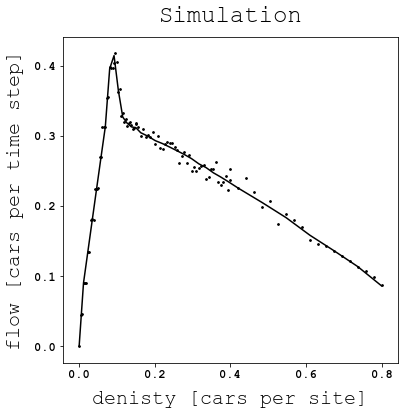

In [286]:
plt.figure(figsize=(6,6))
plt.scatter(t,flow, color ="black", s=3)
plt.plot(t10e4,flow10e4, color ="black")
plt.yticks([0,.1,.2,.3,.4])
plt.xticks([0,.2,.4,.6,.8])
plt.ylabel('flow [cars per time step]',labelpad=10)
plt.xlabel('denisty [cars per site]',labelpad=10)
plt.title('Simulation',pad=15)
plt.tick_params(labelsize=12)
plt.rcParams["font.family"] = "Courier New"
plt.rcParams["font.size"] = "20"
plt.show()

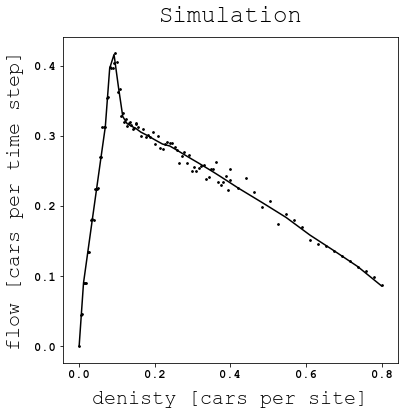

In [288]:
plt.figure(figsize=(6,6))
plt.scatter(t,flow, color ="black", s=3)
plt.plot(t10e4,flow10e4, color ="black")
plt.yticks([0,.1,.2,.3,.4])
plt.xticks([0,.2,.4,.6,.8])
plt.ylabel('flow [cars per time step]',labelpad=10)
plt.xlabel('denisty [cars per site]',labelpad=10)
plt.title('Simulation',pad=15)
plt.tick_params(labelsize=12)
plt.rcParams["font.family"] = "Courier New"
plt.rcParams["font.size"] = "20"
plt.show()